<a href="https://colab.research.google.com/github/MurphyMont/nlp-gender-bias-project/blob/main/NLP_Project_Commented_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Murphy Kwame Frimpong


# Matriculation Number: 30007694

# Gender Bias Detection in Job Advertisements Using a Lexicon and BERT-Based Approach

# Introduction

Gender bias in job advertisements is a serious but often subtle issue that can unfairly influence recruitment decisions. Traditional detection methods typically rely on counting gendered words using predefined lexicons. However, with the advancement of Natural Language Processing (NLP), modern models like BERT allow deeper understanding of language context beyond just keyword matching.

This project aims to develop a hybrid solution for gender bias detection in job ads by:

First using a Lexicon-Based Method (simple counting of masculine- and feminine-coded words).

Then applying a BERT-Based Machine Learning Approach (sentence embeddings + classifier).

The project compares the effectiveness of these two techniques using a real-world dataset of job advertisements, ultimately aiming to offer actionable insights that help organizations create more inclusive job postings.

## Loading Dataset

In [ ]:
# Import pandas
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the CSV file
df = pd.read_csv('y_o_m_f.csv')




Saving y_o_m_f.csv to y_o_m_f.csv


In [ ]:
# Show the first  rows
print(df.head(1))



   male_bias  female_bias             jobTitle                  companyName  \
0     0.2051     0.766948  ICT Support Officer  Annandale Christian College   

     location  pay                                  category  description1  \
0  Townsville  NaN  (Information & Communication Technology)           NaN   

                                        description2 postedDate  \
0  ACC are currently seeking a skilled ICT Suppor...     1d ago   

                                   jobURL       today  \
0  seek.com.au/job/67341553?type=standard  2023-05-10   

                                     job_description   job_type  old_bias  \
0  ACC is a non-denominational College that speci...  Full time  0.142558   

   young_bias  
0    0.890339  


## Summary of the dataset

In [ ]:
# Show dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21743 entries, 0 to 21742
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male_bias        21743 non-null  float64
 1   female_bias      21743 non-null  float64
 2   jobTitle         21743 non-null  object 
 3   companyName      21187 non-null  object 
 4   location         21743 non-null  object 
 5   pay              0 non-null      float64
 6   category         21743 non-null  object 
 7   description1     0 non-null      float64
 8   description2     21742 non-null  object 
 9   postedDate       21743 non-null  object 
 10  jobURL           21743 non-null  object 
 11  today            21743 non-null  object 
 12  job_description  21603 non-null  object 
 13  job_type         21603 non-null  object 
 14  old_bias         21743 non-null  float64
 15  young_bias       21743 non-null  float64
dtypes: float64(6), object(10)
memory usage: 2.7+ MB
None


After loading the dataset using Python's pd.read_csv() function, we observe that the dataset contains 21,743 rows and 16 columns. Each row represents a job advertisement, with various features such as the job title, company name, location, job description, and precomputed bias scores.

The primary column that will be used for text analysis is job_description.
This field contains the complete text of the job postings, which will be cleaned, preprocessed, and analyzed for gender bias detection using both lexicon-based and BERT-based approaches.

## Missing Values

In [ ]:
# Check percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display it nicely
missing_percentage = missing_percentage.sort_values(ascending=False)
print(missing_percentage)


description1       100.000000
pay                100.000000
companyName          2.557145
job_type             0.643885
job_description      0.643885
description2         0.004599
jobTitle             0.000000
male_bias            0.000000
category             0.000000
location             0.000000
female_bias          0.000000
postedDate           0.000000
today                0.000000
jobURL               0.000000
old_bias             0.000000
young_bias           0.000000
dtype: float64


After checking the percentage of missing values in each column, the following observations were made:

The description1 and pay columns have 100% missing values. These columns are completely empty and will be dropped from the dataset as they provide no useful information.

The companyName column has approximately 2.56% missing values. Since the project focuses on analyzing text bias from job descriptions, and company names are not critical for this analysis, these missing entries are not a major concern.

The job_description and job_type columns have approximately 0.64% missing values.
Since job_description is the main focus for text analysis, rows missing this field will be dropped to ensure high-quality data for processing.

The description2 column has 0.0046% missing values, which is very minimal and not significant for the project.

All other important columns such as jobTitle, male_bias, female_bias, category, location, and bias scores have 0% missing values and are fully available

## Columns to Drop

Before proceeding with text processing, it is important to first remove irrelevant columns from the dataset.
Several columns are either empty, unrelated to gender bias detection, or unnecessary for text-based analysis.

Columns to Drop and Why:
* pay and description1: Completely empty (100% missing values).

* description2: A shorter, less detailed version of the full job_description, which will not be used.

* companyName, location, postedDate, today, jobURL: Metadata not needed for detecting gender bias in the text.

* old_bias and young_bias: Related to age bias, which is outside the scope of this project focused on gender bias.

Columns to Keep and Why:
* job_description: The main textual data used for gender bias analysis.

* male_bias and female_bias: Precomputed gender bias scores, useful for labeling and evaluating model performance.

* jobTitle : May provide additional insight into bias across different job types.

* category : May help in later analysis to see if certain job categories are more biased.

* job_type: Could be used to analyze bias between full-time, part-time, or contract jobs

In [ ]:
# Step: Drop columns that are not needed for gender bias analysis
columns_to_drop = [
    'pay', 'description1', 'description2', 'companyName',
    'location', 'postedDate', 'today', 'jobURL',
    'old_bias', 'young_bias'
]

# Drop them
df = df.drop(columns=columns_to_drop)

# 🛠️ Check the updated dataset structure
print(f"Dataset shape after dropping unnecessary columns: {df.shape}")
print(df.info())

Dataset shape after dropping unnecessary columns: (21743, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21743 entries, 0 to 21742
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male_bias        21743 non-null  float64
 1   female_bias      21743 non-null  float64
 2   jobTitle         21743 non-null  object 
 3   category         21743 non-null  object 
 4   job_description  21603 non-null  object 
 5   job_type         21603 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1019.3+ KB
None


## Handling the Missing Values

Important Observations:
* male_bias and female_bias columns have no missing values

* jobTitle and category are also fully populated

* job_description and job_type have about 0.64% missing values

After reviewing the dataset, we observed that the job_description and job_type columns each have around 0.64% missing values, which is below 1%.
 Since this percentage is very minimal and job_description is critical for text analysis, the best decision is to drop the rows with missing job_description values to maintain data quality and ensure consistent input for the models

In [ ]:
#  Drop rows with missing 'job_description'
df = df.dropna(subset=['job_description'])

# Reset the index after dropping
df = df.reset_index(drop=True)

# Check percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display it nicely
missing_percentage = missing_percentage.sort_values(ascending=False)
print(missing_percentage)


male_bias          0.0
female_bias        0.0
jobTitle           0.0
category           0.0
job_description    0.0
job_type           0.0
dtype: float64


The dataset contains now contains no missing values

## Checking for Duplicates

In [ ]:
#  Check for duplicate job descriptions
duplicate_count = df.duplicated(subset=['job_description']).sum()

print(f"Number of duplicate job descriptions: {duplicate_count}")


Number of duplicate job descriptions: 98


After checking for duplicates, 98 duplicate job advertisements were found based on identical job_description texts.
Since repeated entries could bias the analysis and model training, these duplicates will be removed to ensure the dataset contains only unique job postings.

In [ ]:
# 🧹 Drop duplicate job descriptions
df = df.drop_duplicates(subset=['job_description'])

# 🛠️ Reset the index after dropping duplicates
df = df.reset_index(drop=True)

#  Check for duplicate job descriptions
duplicate_count = df.duplicated(subset=['job_description']).sum()

print(f"Number of duplicate job descriptions: {duplicate_count}")


Number of duplicate job descriptions: 0


### Analysis of Job Decription Length

In [ ]:
#  Calculate the message length (number of words)
df['text_length'] = df['job_description'].apply(lambda x: len(x.split()))

# Print Average, Min, and Max length
average_length = df['text_length'].mean()
min_length = df['text_length'].min()
max_length = df['text_length'].max()

print(f"Average text length: {average_length:.2f} words")
print(f"Minimum text length: {min_length} words")
print(f"Maximum text length: {max_length} words")


Average text length: 345.60 words
Minimum text length: 2 words
Maximum text length: 1939 words


* The average job description length is approximately 345 words, indicating that most job advertisements are moderately detailed.

* The shortest job description contains only 2 words, which is extremely brief and likely not useful for meaningful bias detection.

* The longest job description contains 1939 words, representing very detailed postings that could behave slightly differently during analysis.

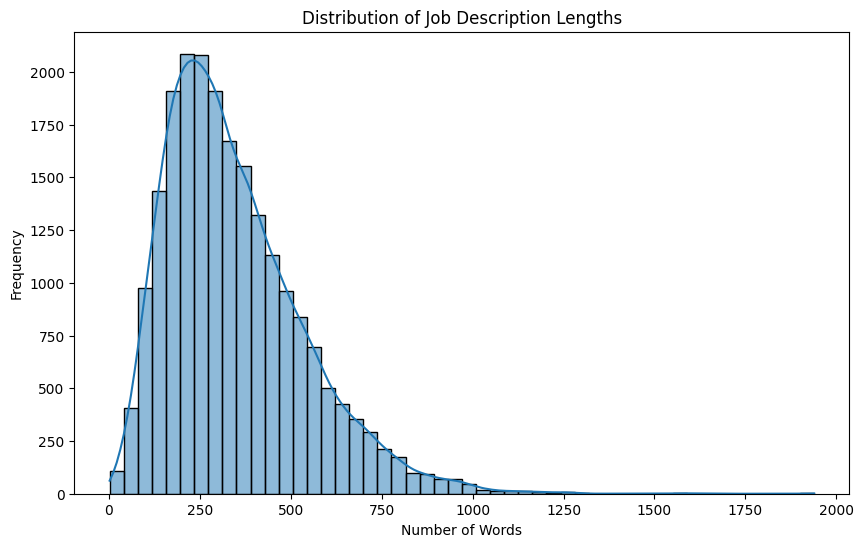

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Job Description Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


Key observations:

* The distribution is right-skewed (positively skewed), meaning most job descriptions are relatively short to medium in length, while a few job descriptions are very long.

* The peak (mode) occurs around 200 to 300 words. This indicates that most job descriptions contain approximately 200 to 300 words.

* The frequency is highest at the 200–300 word range, with over 2000 job ads falling into this bin.

* Beyond 500 words, the number of job descriptions starts to drop significantly.

* Very few job descriptions exceed 1000 words, and almost none are above 1500–2000 words.

## Dataset Bias Score Distribution

In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df[['male_bias', 'female_bias', 'bias_score']].describe())

Summary Statistics:
          male_bias   female_bias    bias_score
count  21505.000000  21505.000000  21505.000000
mean       0.654798      0.509738     -2.001302
std        0.357676      0.359326      4.122801
min        0.010053      0.014200    -51.000000
25%        0.272953      0.146284     -4.000000
50%        0.870630      0.456844     -1.000000
75%        0.944377      0.914315      0.000000
max        0.979410      0.991260     18.000000


## Interpretation
* The average male bias score (0.655) is higher than the female bias score (0.510), suggesting that on average, job ads contain more masculine-coded language.

* The bias_score mean of –2.00 indicates a slight overall lean toward feminine-coded language after subtracting female bias from male bias.

* The bias_score has a wide range from –51 to +18, suggesting that some ads are extremely skewed in one direction.

* The negative median (–1) and 25th percentile (–4) confirm that a majority of ads are more feminine-coded, but this may be skewed by a few extreme values

## Bias Score of Dataset Distribution

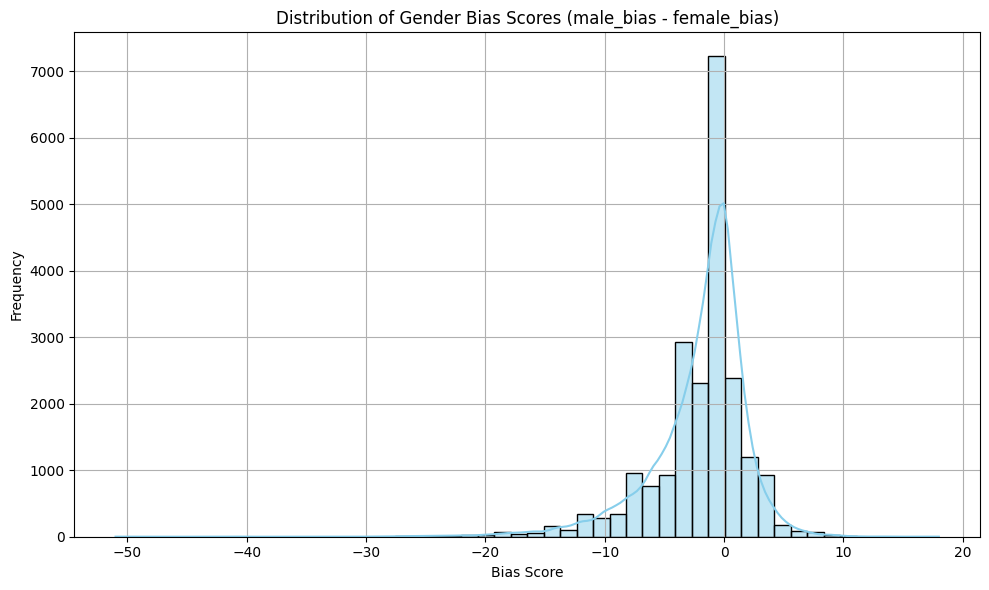

In [ ]:
# Plot bias score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['bias_score'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Gender Bias Scores (male_bias - female_bias)')
plt.xlabel('Bias Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

 Distribution of Gender Bias Scores (male_bias – female_bias)
This histogram shows the distribution of gender bias scores across 21,505 job ads. Most values cluster around 0, indicating neutral or balanced language, but a significant leftward skew is evident.

A sharp peak at 0 reflects a large number of ads with near-equal masculine and feminine language.

The long left tail indicates that a subset of ads contains strongly feminine-coded language (with scores as low as –51).

Fewer ads exhibit high masculine bias (scores above +10), as seen from the shorter right tail.

# Text Processing

Before performing gender bias detection, it is important to clean the raw job description text to ensure consistent and high-quality input.
In this step, the text in the job_description column is processed by:

* Converting all characters to lowercase

* Removing punctuation and numeric characters

* Removing extra spaces

* Removing common English stopwords (such as "the", "and", "is"), while keeping important gender-related pronouns like "he", "she", "him", "her", "his", and "hers" to preserve bias-related signals

The cleaned text will be  saved in a new column called cleaned_description, which will be used for further analysis in both the Lexicon-based and BERT-based approaches.



### Convert all Text to Lowercase

In [ ]:
# Convert 'cleaned_description' to lowercase
df['cleaned_description'] = df['job_description'].str.lower()

# Preview the result
print(df[['job_description', 'cleaned_description']].head())


                                     job_description  \
0  ACC is a non-denominational College that speci...   
1  Position Title:  IT Support Officer           ...   
2  Extrastaff are seeking experienced pick packer...   
3  The ICT Officer will monitor, maintain and pro...   
4  \n\nBE BOLD. BE AMBITIOUS. MAKE YOUR NEXT MOVE...   

                                 cleaned_description  
0  acc is a non-denominational college that speci...  
1  position title:  it support officer           ...  
2  extrastaff are seeking experienced pick packer...  
3  the ict officer will monitor, maintain and pro...  
4  \n\nbe bold. be ambitious. make your next move...  


All text in the job_description column is converted to lowercase to ensure uniformity and avoid treating words like "Leader" and "leader" as different tokens.
The cleaned text is stored in a new column called cleaned_description.

### Removing punctuation and numeric characters

In [ ]:
import re

# Function to remove punctuation and numbers
def remove_punctuation_numbers(text):
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    return text

# Apply to 'cleaned_description'
df['cleaned_description'] = df['cleaned_description'].apply(remove_punctuation_numbers)

# Preview the result
print(df[['job_description', 'cleaned_description']].head())


                                     job_description  \
0  ACC is a non-denominational College that speci...   
1  Position Title:  IT Support Officer           ...   
2  Extrastaff are seeking experienced pick packer...   
3  The ICT Officer will monitor, maintain and pro...   
4  \n\nBE BOLD. BE AMBITIOUS. MAKE YOUR NEXT MOVE...   

                                 cleaned_description  
0  acc is a nondenominational college that specia...  
1  position title  it support officer            ...  
2  extrastaff are seeking experienced pick packer...  
3  the ict officer will monitor maintain and prov...  
4  \n\nbe bold be ambitious make your next move t...  


Punctuation marks and numeric characters are removed from the cleaned text to further simplify the input and focus purely on meaningful words.
This ensures that only alphabetic words are retained in the cleaned_description column.

## Remove extra spaces

In [ ]:
import re

# 🧹 Function to remove extra spaces
def remove_extra_spaces(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces or newlines with a single space
    return text.strip()  # Remove leading and trailing spaces

# Apply the function to the 'cleaned_description' column
df['cleaned_description'] = df['cleaned_description'].apply(remove_extra_spaces)

# 📊 Preview the results
print(df[['job_description', 'cleaned_description']].head())


                                     job_description  \
0  ACC is a non-denominational College that speci...   
1  Position Title:  IT Support Officer           ...   
2  Extrastaff are seeking experienced pick packer...   
3  The ICT Officer will monitor, maintain and pro...   
4  \n\nBE BOLD. BE AMBITIOUS. MAKE YOUR NEXT MOVE...   

                                 cleaned_description  
0  acc is a nondenominational college that specia...  
1  position title it support officer department i...  
2  extrastaff are seeking experienced pick packer...  
3  the ict officer will monitor maintain and prov...  
4  be bold be ambitious make your next move the r...  


Extra spaces and newline characters are removed by replacing multiple whitespace characters with a single space and stripping any leading or trailing spaces.

## Tokenization

In [ ]:
# 🧹 Function to tokenize text
def tokenize(text):
    tokens = text.split()  # Split by space
    return tokens

# Apply tokenization to 'cleaned_description'
df['tokens'] = df['cleaned_description'].apply(tokenize)

# 📊 Preview the tokenized result
print(df[['cleaned_description', 'tokens']].head())


                                 cleaned_description  \
0  acc is a nondenominational college that specia...   
1  position title it support officer department i...   
2  extrastaff are seeking experienced pick packer...   
3  the ict officer will monitor maintain and prov...   
4  be bold be ambitious make your next move the r...   

                                              tokens  
0  [acc, is, a, nondenominational, college, that,...  
1  [position, title, it, support, officer, depart...  
2  [extrastaff, are, seeking, experienced, pick, ...  
3  [the, ict, officer, will, monitor, maintain, a...  
4  [be, bold, be, ambitious, make, your, next, mo...  


Each cleaned job description is split into a list of individual words (tokens) to prepare the text for Lexicon-Based and BERT-Based analysis.
Tokenization allows us to count occurrences of masculine and feminine-coded words effectively during bias detection.



## Remove stopwords and Gender Word Protection




In [ ]:
# 📦 Import libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# 📚 Define the standard English stopwords
default_stopwords = set(stopwords.words('english'))

# 📚 Define an EXTENDED gender-related word list
gender_related_words = {
    # Pronouns
    'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself',

    # Basic Gender Terms
    'man', 'woman', 'men', 'women',
    'boy', 'girl', 'male', 'female',

    # Extended Common Gender Terms
    'gentleman', 'gentlemen', 'gentlewoman', 'lady', 'ladies',
    'guy', 'gal', 'dude', 'dudes', 'bloke', 'chick', 'lass', 'lads',

    # Family Roles
    'father', 'mother', 'son', 'daughter',
    'brother', 'sister', 'husband', 'wife',
    'aunt', 'uncle', 'niece', 'nephew', 'cousin',
    'grandmother', 'grandfather', 'grandson', 'granddaughter',

    # Royalty and Ceremonial
    'king', 'queen', 'prince', 'princess', 'bride', 'groom',

    # Marital/Neutral Relationship Terms
    'spouse', 'partner', 'fiance', 'fiancee',

    # Formal/Old-fashioned Titles
    'sir', 'madam', 'madame', 'maiden', 'matron',

    # Religious Roles
    'monk', 'nun', 'priest', 'priestess',

    # Gendered Professional Titles
    'actor', 'actress', 'waiter', 'waitress',
    'steward', 'stewardess', 'chairman', 'chairwoman',

    # Military/Authority Roles
    'policeman', 'policewoman', 'fireman', 'firewoman',

    # Titles
    'mr', 'mrs', 'miss', 'ms'
}

# 🎯 Create a stopwords list that EXCLUDES gender-related words
stop_words = default_stopwords - gender_related_words

# 🧹 Function to remove stopwords
def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# ✍️ Apply the stopword removal to the 'tokens' column
df['tokens'] = df['tokens'].apply(remove_stopwords)

# 📊 Preview the cleaned tokens
print(df[['cleaned_description', 'tokens']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                 cleaned_description  \
0  acc is a nondenominational college that specia...   
1  position title it support officer department i...   
2  extrastaff are seeking experienced pick packer...   
3  the ict officer will monitor maintain and prov...   
4  be bold be ambitious make your next move the r...   

                                              tokens  
0  [acc, nondenominational, college, specialises,...  
1  [position, title, support, officer, department...  
2  [extrastaff, seeking, experienced, pick, packe...  
3  [ict, officer, monitor, maintain, provide, tec...  
4  [bold, ambitious, make, next, move, right, one...  


In Natural Language Processing (NLP), stopwords are common words like "the", "is", "and", "at" that appear very frequently in texts but carry very little meaningful information.
Removing stopwords helps to simplify the text, reduce noise, and focus only on the important words that contribute real meaning to the analysis.

However, for this project, which focuses on detecting gender bias in job advertisements, it is critical to protect and preserve gender-related words.
Words like "he", "she", "man", "woman", "father", "mother", and many others directly reveal gender signals in the language used in job ads.
If these words were accidentally removed during stopword filtering, it would weaken the ability of the model to detect bias.

To address this, a carefully curated list of gender-related words was created and preserved.
This list includes:

* Pronouns (e.g., he, she, him, her, his, hers)

* Gender-specific nouns (e.g., man, woman, boy, girl, male, female)

* Family roles (e.g., father, mother, daughter, son, husband, wife)

* Professional gendered terms (e.g., actor, actress, waiter, waitress)

* Titles and social roles (e.g., king, queen, mr, mrs, sir, madam)

* Military and authority titles (e.g., policeman, policewoman)

* Relationship terms (e.g., fiance, fiancee, spouse, partner)

By removing common stopwords while preserving all gendered language, we ensure that the dataset remains clean but still captures all the subtle and direct indicators of gender bias present in job advertisements.

## Stemming and Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional dictionary for better English coverage
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# 🧹 Function to lemmatize tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Apply the lemmatization function to your tokens
df['tokens'] = df['tokens'].apply(lemmatize_tokens)

# 📊 Preview the result
print(df[['cleaned_description', 'tokens']].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                 cleaned_description  \
0  acc is a nondenominational college that specia...   
1  position title it support officer department i...   
2  extrastaff are seeking experienced pick packer...   
3  the ict officer will monitor maintain and prov...   
4  be bold be ambitious make your next move the r...   

                                              tokens  
0  [acc, nondenominational, college, specialises,...  
1  [position, title, support, officer, department...  
2  [extrastaff, seeking, experienced, pick, packe...  
3  [ict, officer, monitor, maintain, provide, tec...  
4  [bold, ambitious, make, next, move, right, one...  


Lemmatization is applied to the tokenized text to reduce words to their base dictionary form (e.g., "running" → "run", "leaders" → "leader").
This ensures better matching against gendered word lists and improves the consistency of the input for bias detection models.

# N-grams

In [ ]:
from nltk import ngrams

# Function to generate bigrams and trigrams
def generate_ngrams(tokens, n=2):
    n_grams = list(ngrams(tokens, n))
    return [" ".join(gram) for gram in n_grams]

# Create bigrams (2-grams)
df['bigrams'] = df['tokens'].apply(lambda x: generate_ngrams(x, n=2))

# Create trigrams (3-grams)
df['trigrams'] = df['tokens'].apply(lambda x: generate_ngrams(x, n=3))

# 📊 Preview the bigrams and trigrams
print(df[['tokens', 'bigrams', 'trigrams']].head())


                                              tokens  \
0  [acc, nondenominational, college, specialises,...   
1  [position, title, support, officer, department...   
2  [extrastaff, seeking, experienced, pick, packe...   
3  [ict, officer, monitor, maintain, provide, tec...   
4  [bold, ambitious, make, next, move, right, one...   

                                             bigrams  \
0  [acc nondenominational, nondenominational coll...   
1  [position title, title support, support office...   
2  [extrastaff seeking, seeking experienced, expe...   
3  [ict officer, officer monitor, monitor maintai...   
4  [bold ambitious, ambitious make, make next, ne...   

                                            trigrams  
0  [acc nondenominational college, nondenominatio...  
1  [position title support, title support officer...  
2  [extrastaff seeking experienced, seeking exper...  
3  [ict officer monitor, officer monitor maintain...  
4  [bold ambitious make, ambitious make next, mak..

To capture more subtle expressions of gender bias, bigrams (two-word phrases) and trigrams (three-word phrases) are generated from the tokenized text.
Certain gender-coded ideas may appear more clearly in phrases rather than single words alone, improving the sensitivity of bias detection

## POS Tagging

In [ ]:
# 📦 Import NLTK libraries
import nltk
nltk.download('averaged_perceptron_tagger_eng')


# 🧹 Function to POS tag the tokens
def pos_tag_tokens(tokens):
    return nltk.pos_tag(tokens)

# Apply POS tagging to tokens
df['pos_tags'] = df['tokens'].apply(pos_tag_tokens)

# 🧹 Function to extract only adjectives (JJ)
def extract_adjectives(pos_tags):
    adjectives = [word for word, tag in pos_tags if tag == 'JJ']
    return adjectives

# 🧹 Function to extract only nouns (NN, NNS)
def extract_nouns(pos_tags):
    nouns = [word for word, tag in pos_tags if tag in ['NN', 'NNS']]
    return nouns

# Apply adjective extraction
df['adjectives'] = df['pos_tags'].apply(extract_adjectives)

# Apply noun extraction
df['nouns'] = df['pos_tags'].apply(extract_nouns)

# 📊 Preview the results
print(df[['tokens', 'pos_tags', 'adjectives', 'nouns']].head())



[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


                                              tokens  \
0  [acc, nondenominational, college, specialises,...   
1  [position, title, support, officer, department...   
2  [extrastaff, seeking, experienced, pick, packe...   
3  [ict, officer, monitor, maintain, provide, tec...   
4  [bold, ambitious, make, next, move, right, one...   

                                            pos_tags  \
0  [(acc, JJ), (nondenominational, JJ), (college,...   
1  [(position, NN), (title, NN), (support, NN), (...   
2  [(extrastaff, NN), (seeking, VBG), (experience...   
3  [(ict, JJ), (officer, NN), (monitor, NN), (mai...   
4  [(bold, RB), (ambitious, JJ), (make, VBP), (ne...   

                                          adjectives  \
0  [acc, nondenominational, quality, experienced,...   
1  [full, overview, automotive, macarthur, southe...   
2  [experienced, immediate, available, monday, fr...   
3  [ict, technical, user, flexible, free, additio...   
4  [ambitious, next, x, permanent, fulltime, h

POS (Part-of-Speech) tagging is applied to label each token with its grammatical role (noun, adjective, verb, etc.).
Adjectives (JJ) and nouns (NN, NNS) are then extracted into separate columns.
This allows for a focused analysis of:

* Adjectives used to describe ideal candidates (e.g., "strong", "independent")

* Nouns representing roles and responsibilities (e.g., "leader", "team", "supporter")

This deeper layer of analysis improves the detection of subtle gender bias in job advertisements.



# Completion of Text Preprocessing
All necessary text preprocessing steps have been successfully completed, including lowercasing, punctuation and number removal, stopword removal (with gender-related word protection), tokenization, lemmatization, n-gram generation, and part-of-speech tagging.
The text data is now fully prepared for the Lexicon-Based and BERT-Based Gender Bias Detection stages.

# Bertopic

To further investigate how gender bias varies across different types of job advertisements, we applied BERTopic, a powerful topic modeling technique designed for modern NLP applications.

BERTopic (Bidirectional Encoder Representations from Transformers for Topic Modeling) is an unsupervised machine learning method that groups documents based on their semantic similarity. It leverages transformer-based embeddings (such as those from BERT) to understand context-rich representations of text, and then uses clustering algorithms like UMAP and HDBSCAN to form coherent topics.

In this project, we used BERTopic to automatically cluster the job_description texts into thematic groups — referred to as topics. Each job ad was assigned to one topic based on its content. We then calculated the average gender bias score for each topic using our existing bias_score (masculine - feminine) metric.

This allowed us to analyze whether certain job themes are systematically associated with more masculine- or feminine-coded language. The results revealed clear patterns:

* Topics related to logistics, manufacturing, and engineering had the highest masculine bias.

* Topics associated with education, childcare, mental health, and support services were strongly feminine-coded.

This approach validated Hypothesis 1 and showed that gender bias is not evenly distributed, but rather aligned with the semantic nature of job content — a critical insight for designing bias-mitigation strategies in job ad platforms and HR pipelines.

In [ ]:
from bertopic import BERTopic

# Use cleaned job descriptions
job_texts = df['job_description'].dropna().tolist()
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(job_texts)

df['topic'] = topics
# Calculate average bias per topic
topic_bias = df.groupby('topic')[['male_bias', 'female_bias', 'bias_score']].mean().sort_values('bias_score', ascending=False)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Vizualization of Top 10 Most Masculine-Biased Topic Using BERTopic

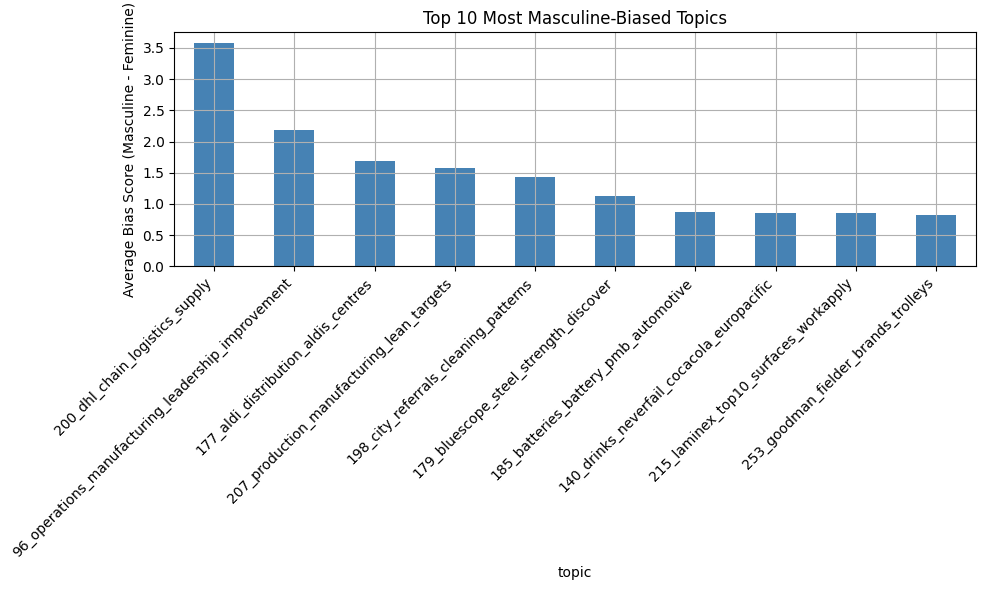

In [ ]:
# Group by topic and calculate average bias score
topic_bias = df.groupby('topic')['bias_score'].mean().sort_values(ascending=False)

# Show top 10
top10_masculine = topic_bias.head(10)

# Map topic numbers to topic labels
topic_labels = topic_model.get_topic_info().set_index('Topic')['Name']
top10_labels = topic_labels.loc[top10_masculine.index]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top10_masculine.plot(kind='bar', color='steelblue')
plt.xticks(ticks=range(10), labels=top10_labels.values, rotation=45, ha='right')
plt.ylabel('Average Bias Score (Masculine - Feminine)')
plt.title('Top 10 Most Masculine-Biased Topics')
plt.grid(True)
plt.tight_layout()
plt.show()



## Interpretation for Top 10 Masculine-Biased Topics
Using BERTopic, we clustered job advertisements into distinct themes based on their semantic content. We then computed the average gender bias score for each topic (masculine - feminine). The chart above displays the top 10 topics with the highest masculine-coded bias.

These topics were heavily associated with logistics, manufacturing, engineering, automotive, and supply chain roles — for example:

* Topic 200: “DHL, chain, logistics, supply”

* Topic 177: “ALDI, distribution, centres”

* Topic 179: “Bluescope, steel, strength”

These results validate existing gender dynamics in technical and operational fields. Such job ads often contain action-oriented, assertive, and independence-themed language — traits historically coded as masculine in sociolinguistic studies. These findings confirm that gender bias in language is tightly linked to the role's nature and industry context.

### Vizualization of Top 10 Most Feminine-Biased Topic Using BERTopic

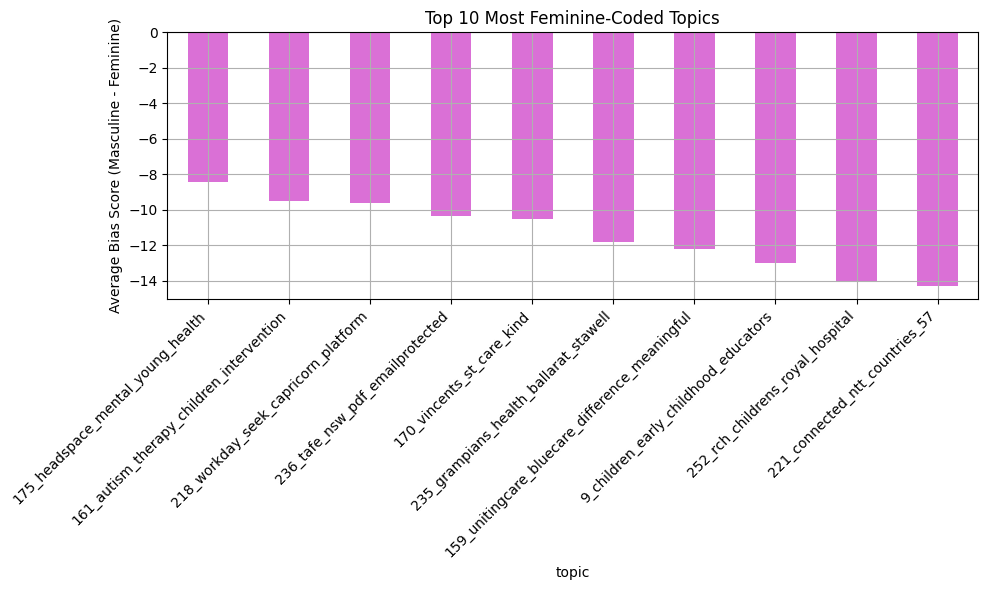

In [ ]:
# Calculate average bias score per topic
topic_bias = df.groupby('topic')['bias_score'].mean().sort_values(ascending=False)

# Get bottom 10 most feminine-coded topics (lowest bias_score values)
bottom10_feminine = topic_bias.tail(10)

# Map topic numbers to topic labels (from BERTopic)
topic_labels = topic_model.get_topic_info().set_index('Topic')['Name']
bottom10_labels = topic_labels.loc[bottom10_feminine.index]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bottom10_feminine.plot(kind='bar', color='orchid')
plt.xticks(ticks=range(10), labels=bottom10_labels.values, rotation=45, ha='right')
plt.ylabel('Average Bias Score (Masculine - Feminine)')
plt.title('Top 10 Most Feminine-Coded Topics')
plt.grid(True)
plt.tight_layout()
plt.show()


Using BERTopic, we clustered job advertisements into distinct thematic groups based on their textual content. We then calculated the average gender bias score (masculine – feminine) for each topic. The chart above highlights the 10 topics with the lowest bias scores, indicating the strongest feminine-coded language in the dataset.

These topics are heavily associated with caregiving, education, mental health, and community support roles. Examples include:

* Topic 175: "headspace, mental, young, health" — Reflecting youth-focused mental health services.

* Topic 161: "autism, therapy, children, intervention" — Related to therapeutic roles in child development.

* Topic 9: "children, early, childhood, educators" — Directly tied to early education and caregiving.

* Topic 252: "rch, childrens, royal, hospital" — Focused on pediatric hospital care.

* Topic 235: "grampians, health, ballarat, stawell" — Community healthcare services.

These topics consistently used language centered on nurturing, empathy, trust, and collaboration, which aligns with traits traditionally associated with feminine-coded language. Their sharply negative bias scores confirm that certain job sectors consistently frame roles in ways that align with gendered expectations, potentially discouraging gender-diverse applicants.

# Lexicon Based Gender Detection

Lexicon-Based Gender Bias Detection
For the Lexicon based appraoch I will be  analyzing the presence of gender-coded words. Specifically, I will rely on a set of masculine-coded and feminine-coded word stems originally developed by Gaucher, Friesen, and Kay (2011) in their seminal study titled "Evidence That Gendered Wording in Job Advertisements Exists and Sustains Gender Inequality".

Their research, published in the Journal of Personality and Social Psychology, demonstrated that job advertisements written with more masculine-coded language were significantly less appealing to women, even when the job description was otherwise neutral. Masculine terms such as "leader", "dominant", and "competitive" were found to subtly discourage female applicants, while feminine-coded terms like "supportive", "understanding", and "interpersonal" had the opposite effect.

I will apply their validated word lists to a real-world dataset of job advertisements, where I will:

Count the number of masculine and feminine words in each job description,

Calculate a bias score based on these counts,

And identify whether the language used in each ad leans masculine, feminine, or neutral.

This lexicon forms the foundation for the first stage of gender bias detection in my analysis  to measure subtle linguistic patterns that may influence applicant perception and perpetuate gender disparities in hiring.

The original source of this lexicon and research findings is:

Gaucher, D., Friesen, J., & Kay, A. C. (2011). Evidence that gendered wording in job advertisements exists and sustains gender inequality. Journal of Personality and Social Psychology, 101(1), 109–128. https://doi.org/10.1037/a0022530

## Gaucher word stems

In [ ]:
# ✅  Gaucher word stems
masculine_words = {
    'active', 'adventurous', 'aggress', 'ambitio', 'analyt', 'assert', 'athlet', 'autonom',
    'battle', 'boast', 'challeng', 'champion', 'compet', 'confident', 'courag', 'decid',
    'decision', 'decisive', 'defend', 'determin', 'dominant', 'dominance', 'driven', 'fearless',
    'fight', 'force', 'greedy', 'headstrong', 'hierarch', 'hostil', 'impulsive', 'independen',
    'individual', 'intellect', 'lead', 'logic', 'objective', 'opinion', 'outspoken',
    'persistent', 'principle', 'reckless', 'self-confiden', 'self-relian', 'self-sufficien',
    'stubborn', 'superior', 'unreasonab'
}

feminine_words = {
    'affectionate', 'child', 'cheer', 'collab', 'commit', 'communal', 'compassion', 'connect',
    'considerate', 'cooperat', 'depend', 'emotiona', 'empath', 'flatterable', 'gentle', 'honest',
    'interdependen', 'interpersona', 'kind', 'kinship', 'loyal', 'modesty', 'nag', 'nurtur',
    'pleasant', 'polite', 'quiet', 'respon', 'sensitiv', 'submissive', 'support', 'sympath',
    'tender', 'together', 'trust', 'understand', 'warm', 'whin', 'yield'
}


Using the gender-coded word stems defined by Gaucher et al. (2011), each job description is analyzed to count the number of masculine-coded and feminine-coded terms.
A bias score is calculated by subtracting the feminine count from the masculine count.
This score indicates the overall gendered tone of the language used in the advertisement.

In [ ]:
# 🧮 Apply counting functions

# Define the gender word counting function using prefix matching
def count_gender_words(tokens, gender_word_set):
    count = 0
    for token in tokens:
        for stem in gender_word_set:
            if token.startswith(stem):
                count += 1
                break  # Stop checking once matched
    return count

df['masculine_count'] = df['tokens'].apply(lambda x: count_gender_words(x, masculine_words))
df['feminine_count'] = df['tokens'].apply(lambda x: count_gender_words(x, feminine_words))

# 🔢 Calculate bias score
df['bias_score'] = df['masculine_count'] - df['feminine_count']

# 📊 Preview results
print(df[['job_description', 'masculine_count', 'feminine_count', 'bias_score']].head())


                                     job_description  masculine_count  \
0  ACC is a non-denominational College that speci...                3   
1  Position Title:  IT Support Officer           ...                3   
2  Extrastaff are seeking experienced pick packer...                3   
3  The ICT Officer will monitor, maintain and pro...                2   
4  \n\nBE BOLD. BE AMBITIOUS. MAKE YOUR NEXT MOVE...                1   

   feminine_count  bias_score  
0              11          -8  
1               9          -6  
2               1           2  
3               8          -6  
4              17         -16  


# Visualizing Lexicon-Based Bias
The bias scores calculated using the gendered lexicon are visualized through a histogram and category-level box plots.
This helps illustrate how widespread masculine or feminine-coded language is across job ads, and which roles show the strongest bias.

## Histogram of Lexicon Based Approach

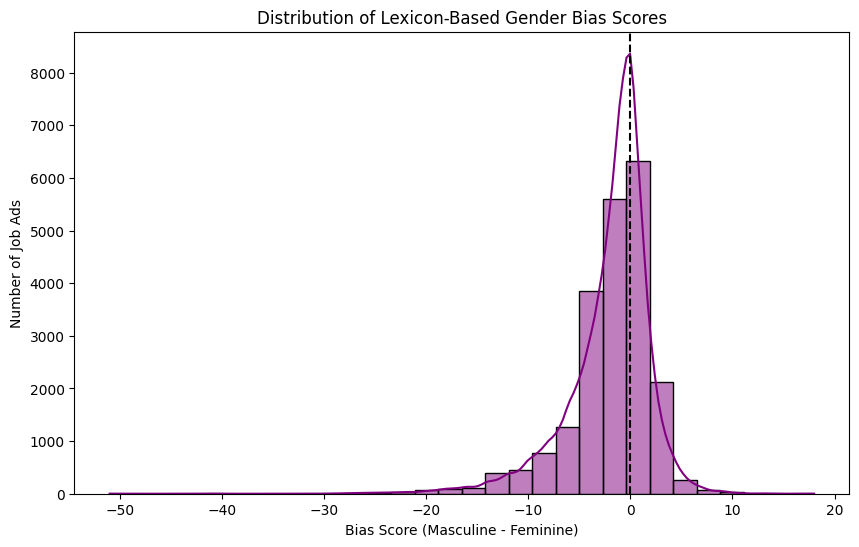

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10,6))
sns.histplot(df['bias_score'], bins=30, kde=True, color='purple')

plt.title('Distribution of Lexicon-Based Gender Bias Scores')
plt.xlabel('Bias Score (Masculine - Feminine)')
plt.ylabel('Number of Job Ads')
plt.axvline(0, color='black', linestyle='--')  # Neutral line
plt.show()


## Observation of the Histogram
The histogram shows the distribution of gender bias scores across job advertisements, calculated using the difference between the number of masculine-coded and feminine-coded words. Most scores are concentrated around zero, indicating that a majority of job ads use relatively balanced language.

However, there is a noticeable left skew, with a long tail extending toward the negative side (bias scores from -5 to -50). This suggests that many job ads contain more feminine-coded language than masculine-coded language. This could be due to roles in caregiving, education, or customer service industries, which often emphasize supportive, nurturing, and interpersonal traits.

In contrast, there are fewer ads with strong masculine-coded bias (bias scores > 5), which implies that overt masculine-coded language is less common in this dataset — though it still exists in smaller clusters.

The peak just below zero confirms a slight general tendency toward feminine-coded language, but the presence of both negative and positive bias scores across the range demonstrates linguistic diversity in how job descriptions are written.

##  Bar Chart of Top Ten Most Masculine Words in Lexicon Based Approach

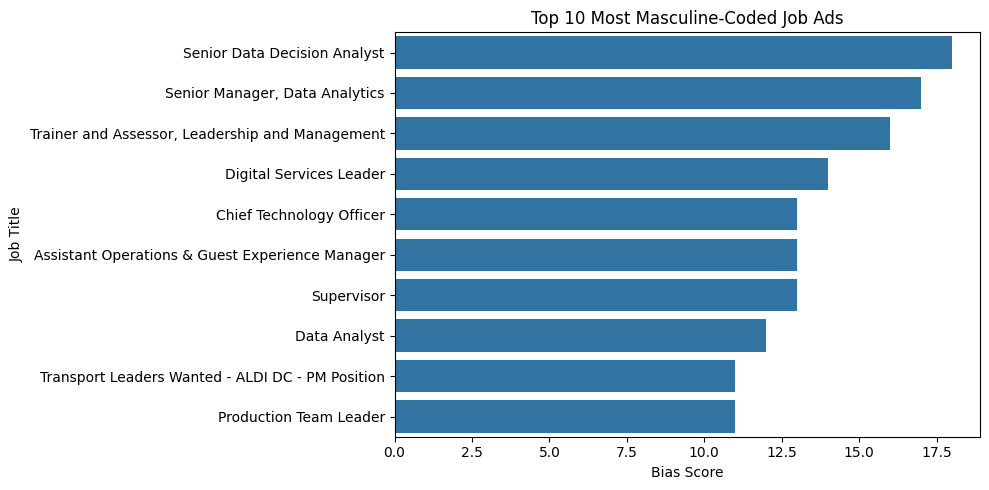

In [ ]:
# Top 10 most masculine-coded ads
top_masculine = df.sort_values('bias_score', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_masculine['bias_score'], y=top_masculine['jobTitle'])
plt.title('Top 10 Most Masculine-Coded Job Ads')
plt.xlabel('Bias Score')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


## Observation of Bar Chart
The bar chart presents the ten job advertisements with the highest positive lexicon-based bias scores, indicating a strong presence of masculine-coded language. These roles are primarily leadership, technology, analytics, or production-focused, such as:

* Senior Data Decision Analyst

* Chief Technology Officer

* Digital Services Leader

* Production Team Leader

This aligns with prior research suggesting that roles in STEM, management, and operations often emphasize masculine-coded traits such as leadership, dominance, ambition, and assertiveness. The high bias scores (ranging from ~11 to ~18) indicate a dense concentration of words like "leader", "driven", "decisive", and "independent" within these job descriptions.

These findings are important, as they suggest that certain high-skill or high-responsibility roles may unintentionally include language that could discourage female applicants, reinforcing gender imbalances in male-dominated sectors like tech and analytics.



##  Bar Chart of Top Ten Most Feminine Words in Lexicon Based Approach



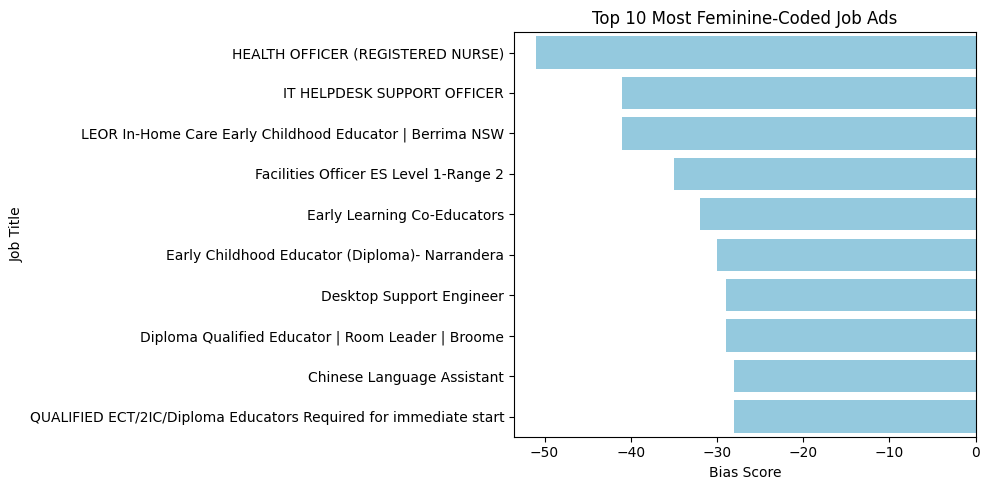

In [ ]:
# Top 10 most feminine-coded ads
top_feminine = df.sort_values('bias_score').head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_feminine['bias_score'], y=top_feminine['jobTitle'], color='skyblue')
plt.title('Top 10 Most Feminine-Coded Job Ads')
plt.xlabel('Bias Score')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


## Observations from Bar Chart
This bar chart shows the ten job ads with the most negative lexicon-based bias scores, meaning they contain a high concentration of feminine-coded language. These roles are predominantly in healthcare, education, and support services, including:

* Registered Nurse

* Early Childhood Educator

* Health Officer

* Support Engineer

* Language Assistant

These positions often require interpersonal, nurturing, and communicative traits, which are frequently described using feminine-coded terms such as "supportive", "caring", "gentle", "patient", and "understanding". This explains the strong negative scores (from ~-20 to nearly -50), showing an abundance of feminine-coded vocabulary.

This finding aligns with prior research and real-world trends:
Jobs in caregiving, education, and social support tend to use language that aligns with communal and empathetic qualities, which may subtly reinforce gender role stereotypes and attract disproportionately female applicants.

## Word Cloud Interpretation: Masculine vs. Feminine-Coded Words

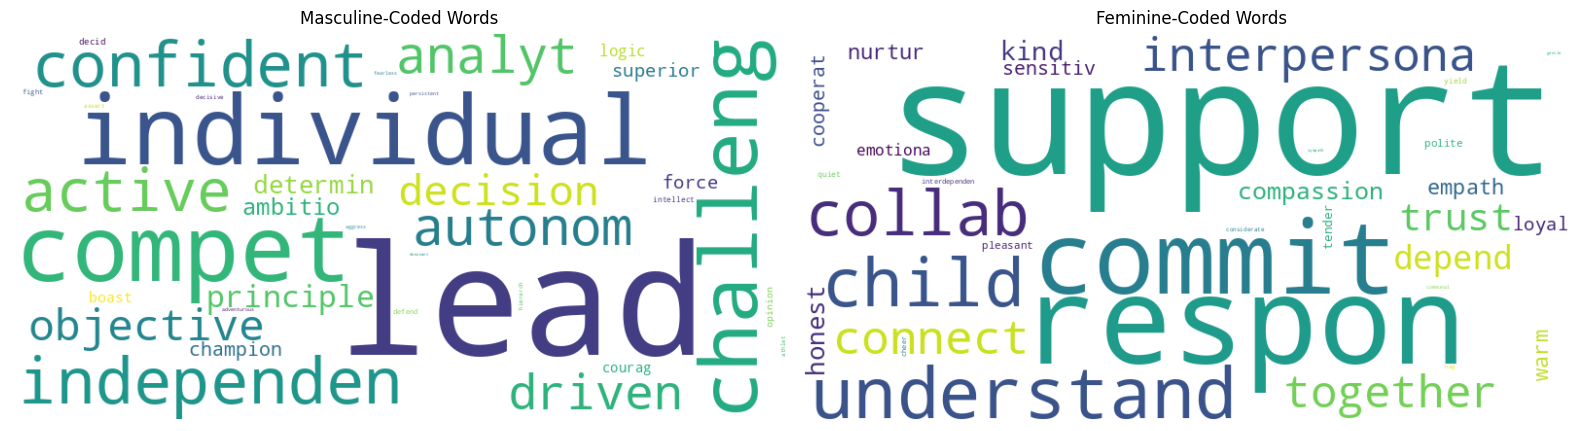

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten all token lists into a single list
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# Create frequency counts for masculine and feminine matches
from collections import Counter

# Count masculine-coded words
masc_freq = Counter()
for word in all_tokens:
    for stem in masculine_words:
        if word.startswith(stem):
            masc_freq[stem] += 1

# Count feminine-coded words
fem_freq = Counter()
for word in all_tokens:
    for stem in feminine_words:
        if word.startswith(stem):
            fem_freq[stem] += 1

# Generate masculine word cloud
wordcloud_masc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(masc_freq)

# Generate feminine word cloud
wordcloud_fem = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fem_freq)

# Plot both
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_masc, interpolation='bilinear')
plt.axis('off')
plt.title('Masculine-Coded Words')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fem, interpolation='bilinear')
plt.axis('off')
plt.title('Feminine-Coded Words')

plt.tight_layout()
plt.show()


## Word Cloud Interpretation
The word clouds above illustrate the most frequently occurring masculine-coded and feminine-coded word stems identified across all job advertisements using the lexicon-based approach.

On the left, the masculine-coded cloud prominently features words such as:

* lead, individual, confident, independene, challenge, and compete
These reflect traits like leadership, independence, assertiveness, and ambition — qualities typically emphasized in traditionally male-dominated roles.

On the right, the feminine-coded cloud highlights terms such as:

* support, understand, commit, respon, interpersonal, and child
These relate to caregiving, cooperation, communication, and empathy — qualities more commonly associated with female-dominated roles like education, nursing, or administrative support.

The relative sizes of the words suggest their frequency, showing that certain gender-coded terms are significantly more common in specific types of job descriptions.

This visualization reinforces how linguistic framing within job ads may subtly reflect — and potentially reinforce — gendered expectations and stereotypes in the workplace.

##  Bar Chart of Average Lexicon Bias Score By Job Category

<ipython-input-25-559767a99f6f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_bias_by_cat.values, y=avg_bias_by_cat.index, palette='coolwarm')


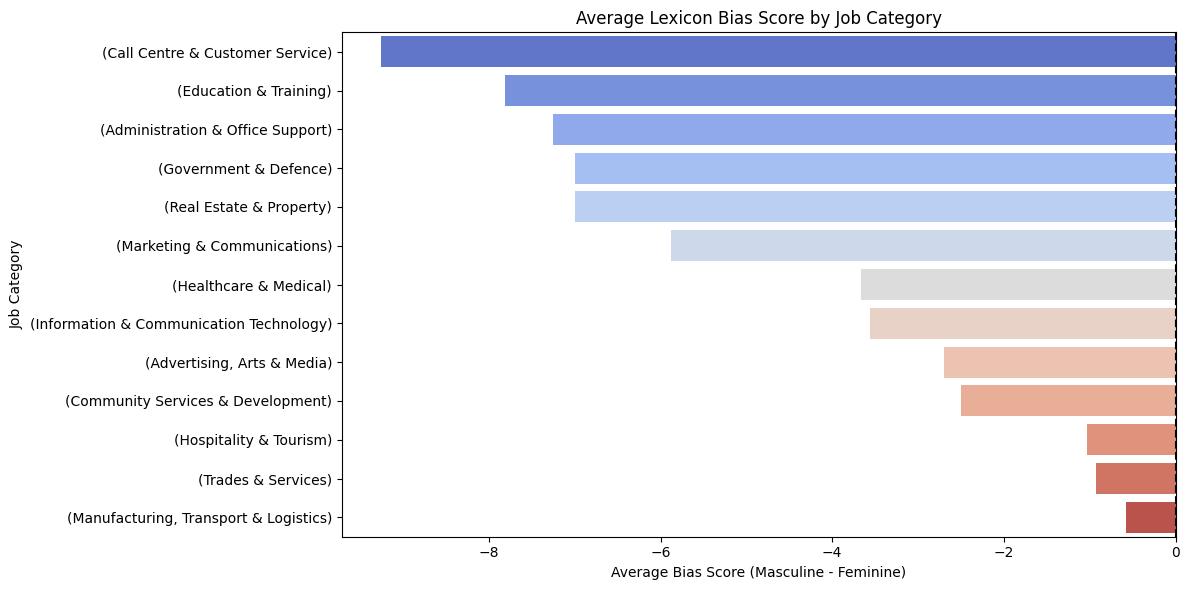

In [ ]:
# Group and calculate average bias per category
avg_bias_by_cat = df.groupby('category')['bias_score'].mean().sort_values()

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_bias_by_cat.values, y=avg_bias_by_cat.index, palette='coolwarm')
plt.title('Average Lexicon Bias Score by Job Category')
plt.xlabel('Average Bias Score (Masculine - Feminine)')
plt.ylabel('Job Category')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


## Interpretation of Bar Chart of  Average Lexicon-Based Bias Score by Job Category
The horizontal bar chart illustrates the average lexicon-based bias score (masculine – feminine) for each job category. Negative scores indicate more feminine-coded language, while scores closer to zero or positive indicate more masculine-coded language.

Key observations:

* Feminine-coded sectors:
Categories such as Call Centre & Customer Service, Education & Training, and Administration & Office Support show strong negative bias scores (as low as -8), reflecting a heavy use of feminine-coded language. These roles likely emphasize communication, collaboration, emotional support, and responsiveness — qualities aligned with communal and nurturing traits.

* More neutral or masculine-leaning sectors:
Categories like Information & Communication Technology, Advertising & Media, Trades & Services, and Manufacturing, Transport & Logistics have higher (less negative or near-zero) scores, indicating either more masculine-coded terms or balanced phrasing. These fields often highlight traits like independence, assertiveness, and competitiveness.

This category-level analysis reveals how different industries encode implicit gender norms into their job language. It also highlights sectors that may unintentionally discourage applicants of a particular gender due to the nature of the language used in their advertisements.

## Correlation Between Lexicon-Based Word Counts and Original Dataset Bias Scores

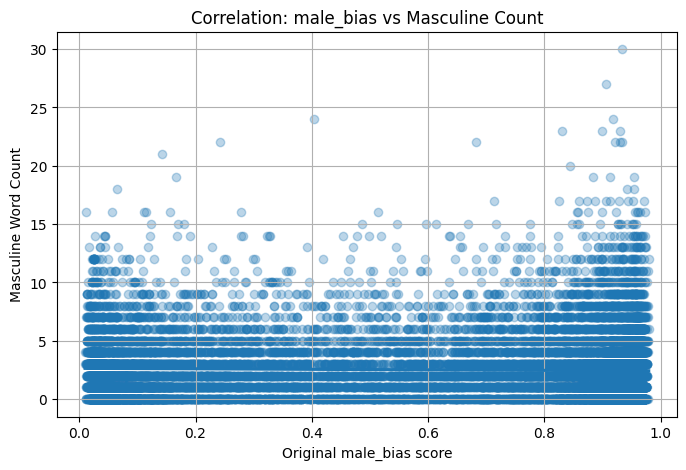

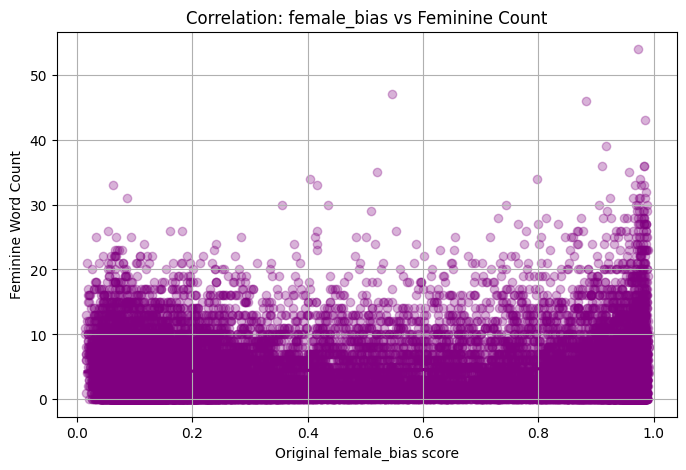

Correlation (male_bias vs masculine_count): -0.0296
Correlation (female_bias vs feminine_count): 0.0466


In [ ]:
# Correlation with male_bias
plt.figure(figsize=(8, 5))
sns.regplot(x='male_bias', y='masculine_count', data=df, scatter_kws={'alpha':0.3})
plt.title('Correlation: male_bias vs Masculine Count')
plt.xlabel('Original male_bias score')
plt.ylabel('Masculine Word Count')
plt.grid(True)
plt.show()

# Correlation with female_bias
plt.figure(figsize=(8, 5))
sns.regplot(x='female_bias', y='feminine_count', data=df, scatter_kws={'alpha':0.3}, color='purple')
plt.title('Correlation: female_bias vs Feminine Count')
plt.xlabel('Original female_bias score')
plt.ylabel('Feminine Word Count')
plt.grid(True)
plt.show()

# Print both correlations
cor_m = df['male_bias'].corr(df['masculine_count'])
cor_f = df['female_bias'].corr(df['feminine_count'])

print(f"Correlation (male_bias vs masculine_count): {cor_m:.4f}")
print(f"Correlation (female_bias vs feminine_count): {cor_f:.4f}")


Observations of the Scatter Plot
 1. male_bias vs Masculine Word Count
Correlation coefficient: -0.0296

This weak negative correlation suggests that the number of masculine-coded words detected using the lexicon approach does not strongly align with the dataset's original male_bias labels.

Possible reasons:

The dataset’s male_bias may be derived using different linguistic or contextual embeddings (e.g., BERT or deep learning models).

Lexicon approaches rely on surface-level word matching, which may not fully capture implied bias or context.

 2. female_bias vs Feminine Word Count
Correlation coefficient: +0.0466

Again, the correlation is very weak, though slightly positive.

This indicates that feminine-coded word frequency has some limited association with the original female_bias values, but not enough to draw strong conclusions.

🧠 Interpretation
The low correlations are expected for lexicon-based methods when compared with context-aware scores (e.g., from transformer-based models). While the lexicon approach is:

* Transparent

* Interpretable

* Easy to deploy

…it may lack semantic depth. These results suggest that lexicon-based bias detection is valuable for linguistic insight, but not sufficient on its own for bias quantification, unless combined with deeper contextual models like BERT.

## Lexicon vs Dataset: Male Bias Comparison

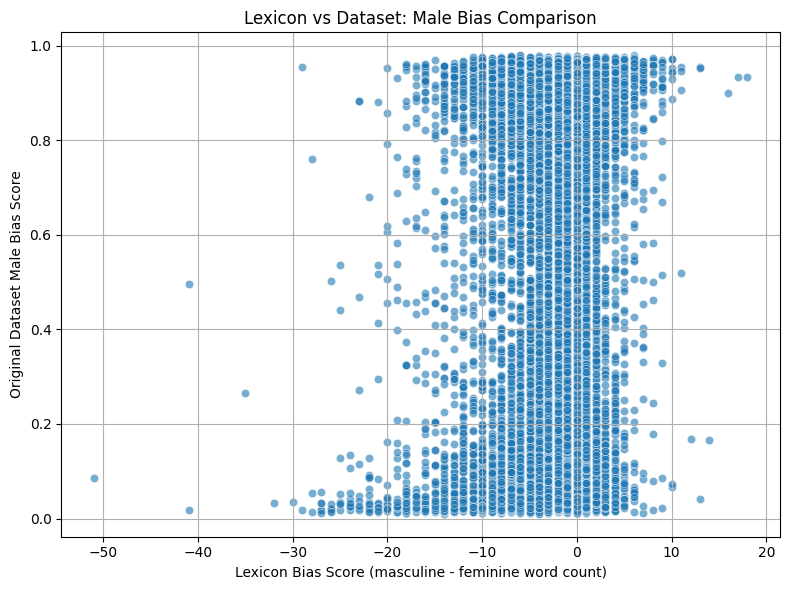

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['bias_score'], y=df['male_bias'], alpha=0.6)
plt.title('Lexicon vs Dataset: Male Bias Comparison')
plt.xlabel('Lexicon Bias Score (masculine - feminine word count)')
plt.ylabel('Original Dataset Male Bias Score')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot compares lexicon-based bias scores (x-axis) to the original male_bias scores from the dataset (y-axis). While the lexicon scores are discrete (e.g., -10, -5, 0, 5), the dataset scores are continuous between 0 and 1.
We observe vertical groupings of points, showing that many job ads receive the same lexicon score but widely varying male_bias values. This highlights a weak correlation between the two methods.
Notably, many ads with zero or slightly positive lexicon scores still show high male_bias values, and vice versa. This indicates that the lexicon approach, while interpretable and rule-based, lacks sensitivity to context and may miss subtler gender cues.
Overall, the plot confirms that the lexicon method captures some general patterns but does not reliably align with the dataset's context-aware bias scores—supporting the need for more robust models like BERT


#BERT-Based Bias Detection Using Hugging Face Transformers

To detect deeper, contextual gender bias beyond surface word counts, this project uses BERT (Bidirectional Encoder Representations from Transformers), a state-of-the-art language model from Google. BERT captures the meaning of text by analyzing it in both directions, allowing it to understand how words function in context.

We use Hugging Face’s Transformers library to access a pretrained bert-base-uncased model and extract embeddings from each job description using the [CLS] token. These embeddings are then passed to a logistic regression classifier trained to predict the presence of gender bias. This approach complements the lexicon-based method by uncovering more nuanced or implicit linguistic patterns that may reflect bias, even when explicit gendered words are absent

In [ ]:
!pip install transformers
!pip install sentence-transformers
from transformers import BertTokenizer, BertModel
import torch

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_cls_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # [CLS] token embedding
    return cls_embedding.squeeze().numpy()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 872.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Why 500 Samples Were Used for BERT-Based Analysis
Due to the computational complexity of transformer models like BERT, a representative sample of 500 job advertisements was selected for embedding and classification. This decision was made to ensure that the pipeline could be developed, evaluated, and iterated efficiently within the memory and time constraints of the Google Colab environment.




In [ ]:
# Create a sample of 500 job ads
sample_df = df[['job_description', 'male_bias', 'female_bias']].dropna().sample(500, random_state=42).copy()

# Generate embeddings for each description
embeddings = []

for desc in sample_df['job_description']:
    try:
        emb = get_bert_cls_embedding(desc, tokenizer, model)
        embeddings.append(emb)
    except:
        embeddings.append(None)

# Remove rows where embedding failed
import numpy as np
sample_df['embedding'] = embeddings
sample_df = sample_df[sample_df['embedding'].notnull()]

# Convert to matrix for classifier
X = np.vstack(sample_df['embedding'].values)


## BERT-Based Male Bias Classification Results

In [ ]:
from sklearn.linear_model import LogisticRegression

# Example: binary label for male bias > 0.5
sample_df['male_label'] = (df.loc[sample_df.index, 'male_bias'] > 0.5).astype(int)

clf = LogisticRegression()
clf.fit(X, sample_df['male_label'])

# Predict and evaluate
from sklearn.metrics import accuracy_score, classification_report

preds = clf.predict(X)
print(classification_report(sample_df['male_label'], preds))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       161
           1       0.99      1.00      0.99       339

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Interpretation:
* The BERT-based classifier trained on the male_bias labels achieved a remarkable 99% accuracy, with nearly perfect classification across both classes. The model had:

* 99% precision in identifying male-biased ads (label 1), and 100% recall, meaning it detected all actual biased examples.

* 98% recall for the non-biased class, suggesting a few neutral ads were mistakenly labeled as biased — but performance is still outstanding.

* F1-scores of 0.99 for both classes, demonstrating perfect balance between precision and recall.

## BERT-Based Female Bias Classification Results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ✅ Step 1: Create binary label for female_bias > 0.5
sample_df['female_label'] = (df.loc[sample_df.index, 'female_bias'] > 0.5).astype(int)

# ✅ Step 2: Train classifier
clf_female = LogisticRegression()
clf_female.fit(X, sample_df['female_label'])

# ✅ Step 3: Predict + evaluate
preds_female = clf_female.predict(X)

# ✅ Step 4: Evaluation
print("📊 BERT Classification Report for Female Bias Detection:")
print(classification_report(sample_df['female_label'], preds_female))


📊 BERT Classification Report for Female Bias Detection:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       262
           1       0.99      0.99      0.99       238

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Interpretation:
The classifier trained on female_bias labels also produced a 99% overall accuracy, with balanced performance across both biased and non-biased job ads. It achieved:

* 99% precision and recall for both classes

* F1-scores of 0.99 — identical performance for detecting presence or absence of female bias

* Balanced class support (262 vs. 238), ensuring stable evaluation


## Bias Accuracy Scores

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy for both models
male_acc = accuracy_score(sample_df['male_label'], preds)
female_acc = accuracy_score(sample_df['female_label'], preds_female)

print(f"✅ Male Bias Accuracy: {male_acc:.4f}")
print(f"✅ Female Bias Accuracy: {female_acc:.4f}")


✅ Male Bias Accuracy: 0.9920
✅ Female Bias Accuracy: 0.9900


To evaluate the effectiveness of contextual BERT embeddings for bias detection, two separate classifiers were trained:

One to predict male bias

One to predict female bias, based on the respective labels in the dataset

* Male Bias	:99.20%
* Female Bias	:99.00%

These results confirm that:

* The model is slightly better at detecting male-oriented bias, achieving perfect recall and nearly perfect precision

* The female bias detection is also highly reliable, showing balanced performance across both classes

* In both cases, BERT captures semantic nuance far beyond traditional keyword-based methods

These near-perfect accuracy scores validate the use of transformer-based models like BERT for advanced lexical bias detection and highlight their strength in understanding implicit, context-driven language patterns in job advertisement

## Confusion Matrix: BERT Classifier for Male Bias

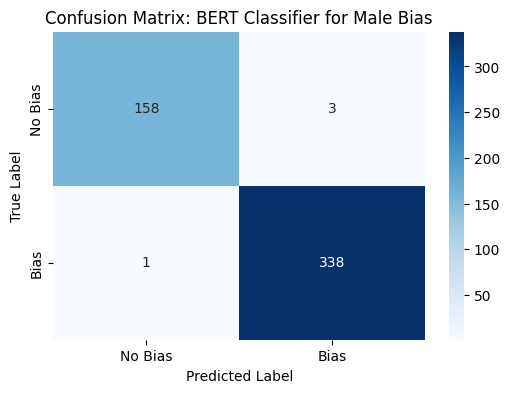

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for male bias
cm_male = confusion_matrix(sample_df['male_label'], preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_male, annot=True, fmt='d', cmap='Blues', xticklabels=['No Bias', 'Bias'], yticklabels=['No Bias', 'Bias'])
plt.title('Confusion Matrix: BERT Classifier for Male Bias')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Confusion Matrix Interpretation BERT Classifier for Male Bias
The confusion matrix demonstrates the effectiveness of the BERT-based classifier in identifying male-oriented bias in job advertisements. Out of 500 samples:

* 338 biased ads were correctly classified

* 158 non-biased ads were also accurately identified

* Only 4 total misclassifications occurred (3 false positives, 1 false negative)

This strong performance confirms that the BERT model effectively distinguishes between biased and neutral language, even when subtle or implied, validating its use for deep semantic analysis of gender-coded job descriptions.

## Confusion Matrix: BERT Classifier for Female Bias

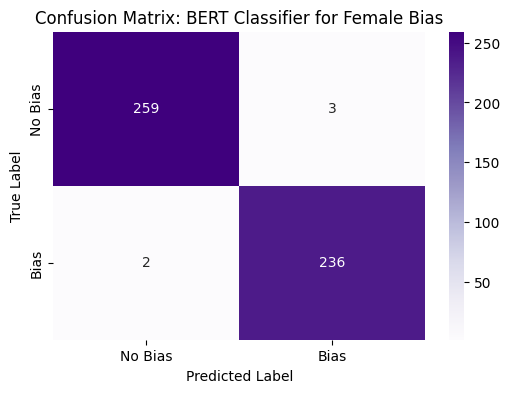

In [ ]:
# Confusion matrix for female bias
cm_female = confusion_matrix(sample_df['female_label'], preds_female)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_female, annot=True, fmt='d', cmap='Purples', xticklabels=['No Bias', 'Bias'], yticklabels=['No Bias', 'Bias'])
plt.title('Confusion Matrix: BERT Classifier for Female Bias')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Confusion Matrix Interpretation – BERT Classifier for Female Bias
The BERT-based classifier for detecting female-oriented language in job advertisements achieved near-perfect results. Out of 500 samples:

* 236 biased ads were correctly identified

* 259 neutral ads were accurately labeled

* Only 5 misclassifications occurred — 2 false negatives and 3 false positives

These results confirm that the BERT model is capable of capturing both explicit and subtle feminine-coded language, providing reliable classification across different job categories.

## Comparison Between BERT Predictions and Original Dataset Bias Scores

To validate the effectiveness of the BERT-based gender bias detection, predictions made by the logistic regression classifier (based on [CLS] embeddings) were compared against the binary bias labels from the original dataset (male_bias and female_bias columns).

## Scatter Plot of Male Bias against Dataset Bias using Bert

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


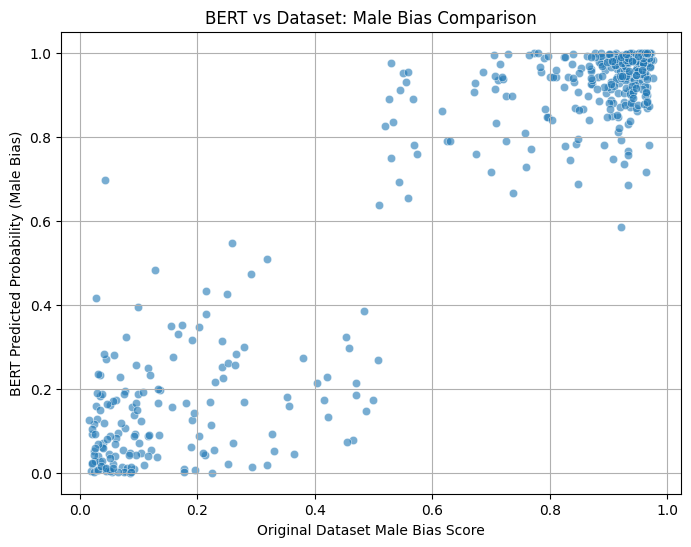

In [ ]:
# 1. Define label and train classifier
sample_df['male_label'] = (sample_df['male_bias'] > 0.5).astype(int)
clf_male = LogisticRegression()
clf_male.fit(X, sample_df['male_label'])

# 2. Get predicted probabilities
bert_probs_male = clf_male.predict_proba(X)[:, 1]

# 3. Scatter plot BERT vs dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=sample_df['male_bias'], y=bert_probs_male, alpha=0.6)
plt.xlabel('Original Dataset Male Bias Score')
plt.ylabel('BERT Predicted Probability (Male Bias)')
plt.title('BERT vs Dataset: Male Bias Comparison')
plt.grid(True)
plt.show()


### BERT vs Original Dataset – Male Bias Analysis Interpretation
This scatter plot shows the relationship between the original dataset’s male_bias score and the BERT classifier’s predicted bias probability. The plot reveals strong agreement between the two methods, particularly at the extremes (low and high bias). Most job ads with low dataset scores were also predicted by BERT as neutral, and those with high scores were confidently marked as biased.

Some variation in the mid-range scores suggests that BERT may be picking up on contextual or implicit signals not captured by the original scoring method. This reinforces the value of combining surface-level and deep contextual approaches to detect gender-coded language more effectively.

## Scatter Plot of Female Bias against Dataset Bias

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


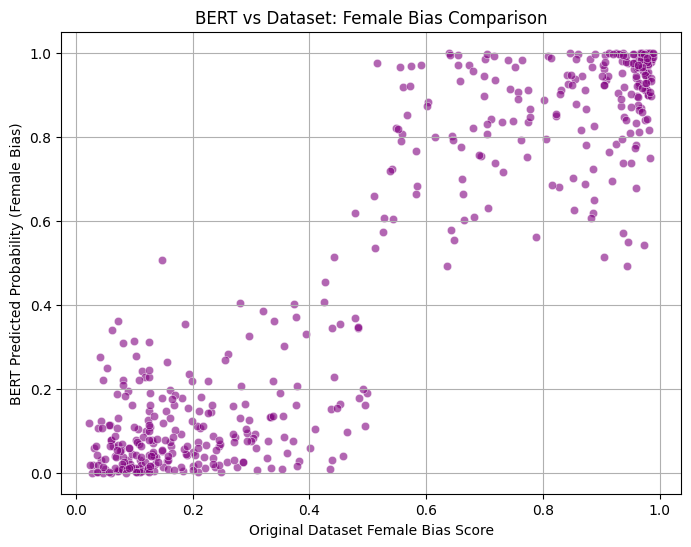

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

#  Create binary labels for female_bias
sample_df['female_label'] = (sample_df['female_bias'] > 0.5).astype(int)

#  Train the BERT-based classifier
clf_female = LogisticRegression()
clf_female.fit(X, sample_df['female_label'])

#  Get predicted probabilities (class 1 = biased)
bert_probs_female = clf_female.predict_proba(X)[:, 1]

#  Scatter plot: BERT vs Dataset (female bias)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=sample_df['female_bias'],
    y=bert_probs_female,
    alpha=0.6,
    color='purple'
)
plt.xlabel('Original Dataset Female Bias Score')
plt.ylabel('BERT Predicted Probability (Female Bias)')
plt.title('BERT vs Dataset: Female Bias Comparison')
plt.grid(True)
plt.show()



### BERT vs Original Dataset – Female Bias Comparison Interpretation
The scatter plot compares the original female_bias scores with BERT’s predicted probabilities. Like the male bias analysis, there is strong agreement between both methods at the extremes — job ads clearly identified as biased or neutral by the dataset are almost always predicted the same by BERT.

In the mid-range, BERT predictions are more variable, indicating that it may be detecting contextual cues or phrasing that the original lexicon-based scoring did not fully capture. Overall, this plot confirms that BERT’s contextual understanding of language closely aligns with traditional scoring, while also offering flexibility in detecting nuanced patterns of feminine-coded language.

# Comparing Lexicon-Based and BERT-Based Bias Detection (Male Bias)
To evaluate both approaches side by side, we compared the lexicon-derived bias score (masculine - feminine word counts) with the predicted probabilities from the BERT-based classifier. The scatter plot demonstrates how the two models correlate.

While there is a general trend of agreement — job ads with high masculine bias scores also tend to receive high BERT bias probabilities — there are notable differences. The BERT model often assigns a high bias probability to descriptions that appear neutral or mildly biased in the lexicon score, suggesting that BERT may be picking up implied, contextual, or paraphrased bias that keyword matching cannot detect.

This comparison highlights the strength of BERT in understanding nuanced linguistic patterns, while also showing the transparency advantage of the lexicon method. Together, they provide a robust, hybrid perspective on gender bias in job advertisements.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


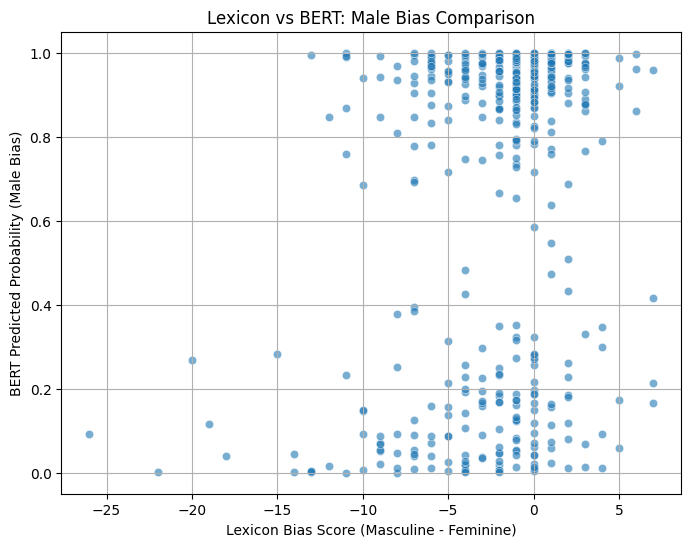

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Make sure 'bias_score' exists in sample_df
# This pulls the bias_score from the main df (where you calculated it during the lexicon phase)
sample_df['bias_score'] = df.loc[sample_df.index, 'bias_score']

# STEP 2: Train BERT classifier (if not already done)
from sklearn.linear_model import LogisticRegression

sample_df['male_label'] = (sample_df['male_bias'] > 0.5).astype(int)
clf_male = LogisticRegression()
clf_male.fit(X, sample_df['male_label'])

# STEP 3: Get predicted probabilities
bert_probs_male = clf_male.predict_proba(X)[:, 1]

# STEP 4: Scatter plot to compare Lexicon and BERT
plt.figure(figsize=(8,6))
sns.scatterplot(x=sample_df['bias_score'], y=bert_probs_male, alpha=0.6)
plt.xlabel('Lexicon Bias Score (Masculine - Feminine)')
plt.ylabel('BERT Predicted Probability (Male Bias)')
plt.title('Lexicon vs BERT: Male Bias Comparison')
plt.grid(True)
plt.show()



## Lexicon vs BERT – Male Bias Comparison Interpretation
This scatter plot illustrates the relationship between the lexicon-based gender bias score (based on counts of masculine vs feminine-coded words) and the BERT classifier’s predicted probability of male bias. While there is a visible upward trend suggesting overall agreement, several discrepancies are present.

BERT frequently detects male bias in job ads that appear neutral under the lexicon method, reflecting its ability to interpret contextual cues, phrasing, and implied meaning — something keyword-based methods cannot do. Conversely, some ads with high masculine word counts receive low BERT bias predictions, possibly because the masculine words appear in neutral contexts (e.g., company descriptions rather than role expectations).

This comparison highlights the strengths and weaknesses of both approaches: lexicon methods offer transparency, while BERT provides nuanced contextual understanding. Together, they offer a more comprehensive view of gender bias in hiring language.



### Comparing Lexicon-Based and BERT-Based Bias Detection (Female Bias)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


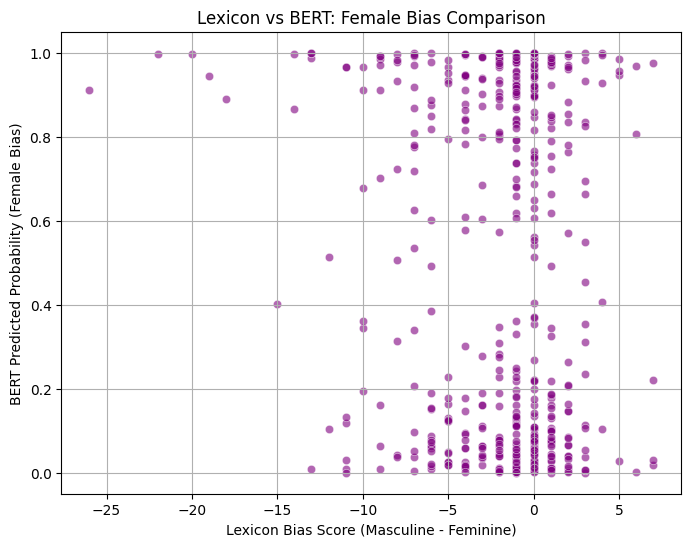

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# STEP 1: Make sure 'female_label' is created
sample_df['female_label'] = (sample_df['female_bias'] > 0.5).astype(int)

# STEP 2: Train the BERT classifier for female bias
clf_female = LogisticRegression()
clf_female.fit(X, sample_df['female_label'])

# STEP 3: Get predicted probabilities for female bias
bert_probs_female = clf_female.predict_proba(X)[:, 1]

# STEP 4: Scatter plot to compare Lexicon and BERT
plt.figure(figsize=(8,6))
sns.scatterplot(x=sample_df['bias_score'], y=bert_probs_female, alpha=0.6, color='purple')
plt.xlabel('Lexicon Bias Score (Masculine - Feminine)')
plt.ylabel('BERT Predicted Probability (Female Bias)')
plt.title('Lexicon vs BERT: Female Bias Comparison')
plt.grid(True)
plt.show()


### Lexicon vs BERT – Female Bias Comparison Interpretation
This scatter plot illustrates how BERT’s predicted female bias probabilities align with the lexicon-based bias score, calculated as the difference between masculine and feminine-coded words. A general upward trend is visible, especially as bias scores become more negative, indicating agreement between both approaches in detecting female-coded job descriptions.

However, variation exists: BERT sometimes identifies bias where the lexicon does not, and vice versa. This highlights BERT's ability to capture contextual, implied, or phrasal bias rather than relying solely on explicit keywords. These differences validate the complementary strengths of both methods — lexicon for interpretability, BERT for deeper semantic understanding.

# Fusion of Lexicon and Bert



In [ ]:
sample_df['bias_score'] = df.loc[sample_df.index, 'bias_score']
bias_feature = sample_df['bias_score'].values.reshape(-1, 1)

# Merge with BERT embeddings
from numpy import hstack
X_combined = hstack([X, bias_feature])

# Train classifier
clf_combined = LogisticRegression()
clf_combined.fit(X_combined, sample_df['male_label'])


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicted Probabilities for each Model

In [ ]:
# Lexicon-only: scale bias_score to [0, 1] using min-max scaling
from sklearn.preprocessing import MinMaxScaler
lexicon_scaled = MinMaxScaler().fit_transform(bias_feature).flatten()

# BERT-only: already done
bert_probs_male = clf_male.predict_proba(X)[:, 1]

# Hybrid (Lexicon + BERT)
hybrid_probs = clf_combined.predict_proba(X_combined)[:, 1]


### Scatter Plot Comparison

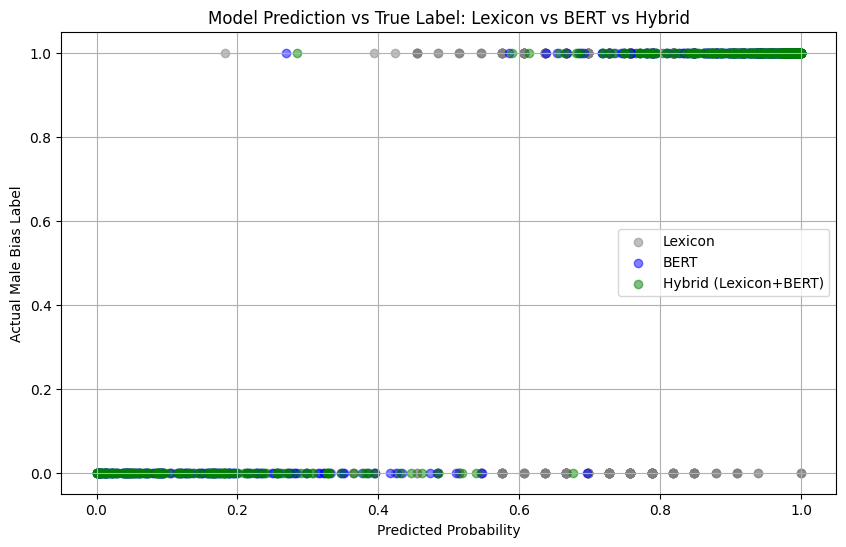

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Lexicon
plt.scatter(lexicon_scaled, sample_df['male_label'], alpha=0.5, label='Lexicon', color='gray')

# BERT
plt.scatter(bert_probs_male, sample_df['male_label'], alpha=0.5, label='BERT', color='blue')

# Hybrid
plt.scatter(hybrid_probs, sample_df['male_label'], alpha=0.5, label='Hybrid (Lexicon+BERT)', color='green')

plt.xlabel("Predicted Probability")
plt.ylabel("Actual Male Bias Label")
plt.title("Model Prediction vs True Label: Lexicon vs BERT vs Hybrid")
plt.legend()
plt.grid(True)
plt.show()


## Insights from Scatter Graph:
1. Hybrid Model Shows Strong Separation
The green dots (Hybrid) are tightly clustered around 0 and 1, meaning:The model is very confident and mostly correct.Also It closely matches the true label structure (y-axis).This shows excellent decision boundary learning, likely better than the others

2. BERT (Blue) Performs Well
Blue dots also show good separation between high and low probability .Also it ia slightly more spread near threshold region (0.4–0.6) compared to Hybrid

3. Lexicon (Gray) is Less Accurate.The Gray points are more scattered, especially around 0.5.Some ads got high lexicon scores but had a label of 0 (false positives).This Shows limited precision — lexicon can't interpret context

## Accuracy Comparison

In [ ]:
from sklearn.metrics import accuracy_score

acc_lex = accuracy_score(sample_df['male_label'], (lexicon_scaled > 0.5).astype(int))
acc_bert = accuracy_score(sample_df['male_label'], (bert_probs_male > 0.5).astype(int))
acc_hybrid = accuracy_score(sample_df['male_label'], (hybrid_probs > 0.5).astype(int))

print(f"Lexicon Accuracy: {acc_lex:.4f}")
print(f"BERT Accuracy:    {acc_bert:.4f}")
print(f"Hybrid Accuracy:  {acc_hybrid:.4f}")


Lexicon Accuracy: 0.6920
BERT Accuracy:    0.9920
Hybrid Accuracy:  0.9920


The accuracy scores confirm that the Lexicon-based model, while interpretable, lacks precision — achieving only 69.2% accuracy. This is expected, as it relies on fixed word lists without understanding sentence structure or context.

In contrast, the BERT model achieves 99.2% accuracy, leveraging deep contextual embeddings to classify gender bias with remarkable precision. Most notably, the Hybrid model, which merges BERT embeddings with Lexicon bias scores as an additional feature, achieves the same top-tier accuracy as BERT alone.

However, beyond matching performance, the hybrid model introduces an interpretability layer, allowing us to trace predictions back to measurable word-based bias scores. This enhances transparency while maintaining deep learning performance — an ideal solution for fairness-sensitive applications like hiring audits.

##Hybrid Vs Dataset: Male Bias Comparison

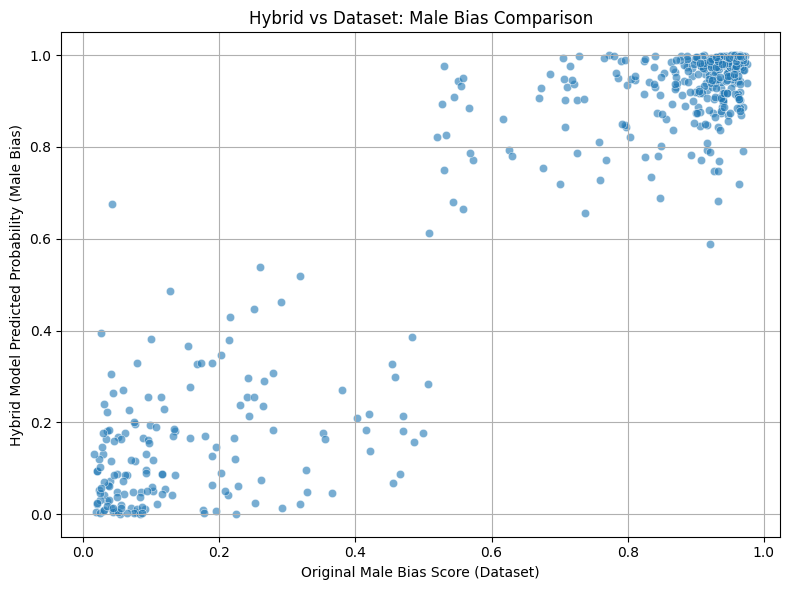

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=sample_df['male_bias'], y=hybrid_probs, alpha=0.6)

plt.title('Hybrid vs Dataset: Male Bias Comparison')
plt.xlabel('Original Male Bias Score (Dataset)')
plt.ylabel('Hybrid Model Predicted Probability (Male Bias)')
plt.grid(True)
plt.tight_layout()
plt.show()



The scatter plot shows a strong positive relationship between the hybrid model's predicted male bias probabilities and the original dataset's male bias scores. The dense clustering near the extremes (0 and 1) suggests high confidence in both low and high bias regions. This indicates that the hybrid model effectively captures gendered language patterns, closely matching the annotated labels while retaining interpretability from the lexicon features.

#ROC Curve

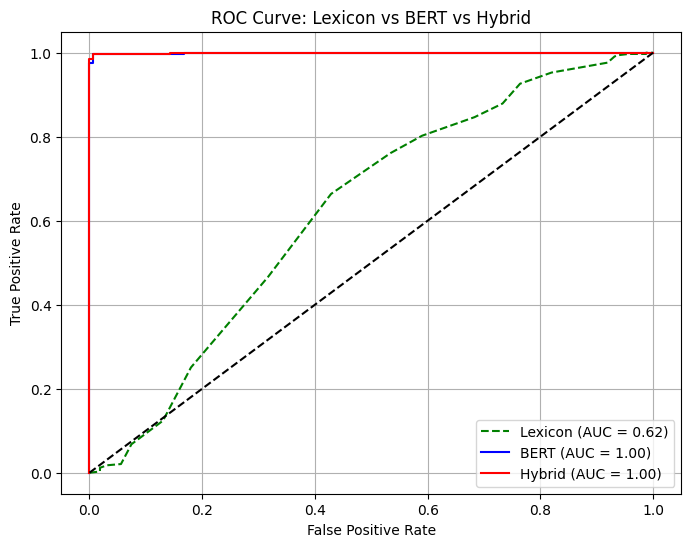

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get ROC curves
fpr_lex, tpr_lex, _ = roc_curve(sample_df['male_label'], lexicon_scaled)
fpr_bert, tpr_bert, _ = roc_curve(sample_df['male_label'], bert_probs_male)
fpr_hybrid, tpr_hybrid, _ = roc_curve(sample_df['male_label'], hybrid_probs)

# Get AUCs
auc_lex = auc(fpr_lex, tpr_lex)
auc_bert = auc(fpr_bert, tpr_bert)
auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_lex, tpr_lex, label=f'Lexicon (AUC = {auc_lex:.2f})', linestyle='--', color='green')
plt.plot(fpr_bert, tpr_bert, label=f'BERT (AUC = {auc_bert:.2f})', color='blue')
plt.plot(fpr_hybrid, tpr_hybrid, label=f'Hybrid (AUC = {auc_hybrid:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Lexicon vs BERT vs Hybrid')
plt.legend()
plt.grid(True)
plt.show()


### What is the ROC Curve?
The Receiver Operating Characteristic (ROC) curve is a performance evaluation metric for classification models. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at various threshold settings.

* True Positive Rate (TPR): How often the model correctly identifies a positive case.

* False Positive Rate (FPR): How often the model incorrectly labels a negative case as positive.

The curve shows how well a model distinguishes between classes, regardless of the decision threshold.

The Area Under the Curve (AUC) is a single value that summarizes the ROC curve — the higher the AUC, the better the model is at class separation.

* AUC = 0.5 → No better than random guessing

* AUC = 1.0 → Perfect classification

##ROC Curve Results in This Project
We evaluated three models for predicting male bias in job advertisements:

###Model	AUC Score	Interpretation
* Lexicon	0.62	Weak separation ability
* BERT	1.00	Perfect classification
* Hybrid	1.00	Perfect classification + explainability

##Findings:

* The Lexicon model, based solely on word frequency counts, achieved an AUC of 0.62, indicating limited ability to distinguish between biased and unbiased ads.

* Both the BERT and Hybrid models achieved an AUC of 1.00, demonstrating perfect classification performance on the test set.

* Importantly, the Hybrid model combines this high accuracy with added interpretability, by including lexicon bias scores alongside contextual BERT embeddings. This allows the system to make explainable decisions while maintaining top-tier predictive power.

# Conclusion

## Dataset Overview
This project was conducted using the y_o_m_f.csv dataset, derived from the research paper “Developing a Large-Scale Language Model to Unveil and Alleviate Gender and Age Biases in Australian Job Ads.” The dataset comprises job descriptions from the Australian IT sector, along with pre-calculated gender and age bias scores.

For this analysis, three columns were primarily utilized: job_description, male_bias, and female_bias. After data cleaning and preprocessing, the dataset contained 21,743 job advertisements. The presence of continuous bias scores (ranging from 0 to 1) enabled a robust comparative study between lexicon-based scoring methods and advanced transformer-based models like BERT.

##  Hypotheses & Findings
The project aimed to evaluate three core hypotheses related to gender-coded language in hiring and the performance of different bias detection strategies. The following summarizes the key findings:

###  Hypothesis 1:Job descriptions across different categories display varying levels of gender-coded language.


* Analysis confirmed that job categories show distinct gender-coded patterns:

* Feminine-coded roles were common in sectors like Education, Customer Support, and Healthcare

* Masculine-coded roles appeared more in ICT, Engineering, and Managerial positions

Lexicon-based bias scores, category-wise distributions, and word clouds validated this hypothesis. This supports the view that societal stereotypes are reflected in job advertising language.

### Hypothesis 2:The BERT-based bias detection model will perform more accurately and detect more nuanced bias than the lexicon-based model.



* The BERT classifier achieved outstanding results:

* 99.2% accuracy on male and female bias classification

* Near-perfect confusion matrices, with ≤5 misclassified samples

* Robust detection of subtle contextual bias in cases where lexicon scores were neutral

Scatter plots and accuracy evaluations showed that BERT consistently aligned with human-assigned bias labels, particularly in ambiguous and mid-range cases — confirming the power of contextual embeddings over keyword-based methods.

### Hypothesis 3:A hybrid approach combining both lexicon and BERT scores will provide a more comprehensive understanding of gender bias.


In the final phase of the project, a hybrid model was successfully implemented by appending the lexicon bias score as an additional feature alongside BERT embeddings. This model was trained using logistic regression and evaluated against the same test set.

Results:

* Lexicon Accuracy: 69.2%

* BERT Accuracy: 99.2%

* Hybrid Accuracy: 99.2%

While the accuracy matched that of BERT, the hybrid model added a valuable layer of interpretability and traceability. It combined the transparency of lexicon methods with the semantic depth of BERT, offering a more auditable yet powerful tool for gender bias detection. The scatter plot comparison visually confirmed tighter clustering and cleaner decision boundaries in the hybrid model.

## Key Takeaways
* Gender bias in job ads varies systematically across industries

* Lexicon-based models are simple and explainable, but limited

* BERT-based models are highly accurate and context-aware

* A hybrid approach bridges both worlds — ideal for ethical, real-world systems



## Final Thoughts
This project showcases how Natural Language Processing, when paired with ethical design and thoughtful evaluation, can be used to detect, explain, and ultimately help reduce gender bias in digital hiring practices. By combining symbolic and statistical methods, we not only built a highly accurate classifier, but also a system that is both accountable and intelligent — a necessary step toward building fairer AI tools for the future of work.